### 1.Preparing steps

##### Import libs

In [349]:
#import required libraries
import pandas as pd 
import numpy as np
import os

from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV,SGDRegressor, Ridge, Lasso, ElasticNet

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

from catboost import CatBoostRegressor

import warnings

import seaborn as sns

In [350]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

##### Load data

In [351]:
#set path to data
data_path = ['C:/kaggle projects/Housing Prices Competition for Kaggle Learn Users/']
train_path = os.sep.join(data_path + ['train.csv'])
test_path = os.sep.join(data_path + ['test.csv'])
train = pd.read_csv(train_path, sep = ",")
test = pd.read_csv(test_path, sep = ",")


In [352]:
print("The train data size : {}" .format(train.shape))
print("The test data size : {}" .format(test.shape))

The train data size : (1460, 81)
The test data size : (1459, 80)


In [353]:
train_orig = train 
test_orig = test

train_ID = train['Id']
test_ID = test['Id']

train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

print("The train data size after droping Id : {}" .format(train.shape))
print("The test data size  after droping Id : {}" .format(test.shape))

The train data size after droping Id : (1460, 80)
The test data size  after droping Id : (1459, 79)


##### Concate data

In [354]:
n_train = train.shape[0]
n_test = test.shape[0]
y_train = train['SalePrice'].values
df = pd.concat((train, test)).reset_index(drop=True)
print("The dataframe size : {}" .format(df.shape))

The dataframe size : (2919, 80)


### 2.EDA

##### Correlation checking

In [225]:
num_col = df.select_dtypes(exclude=["object"]).columns

<AxesSubplot:>

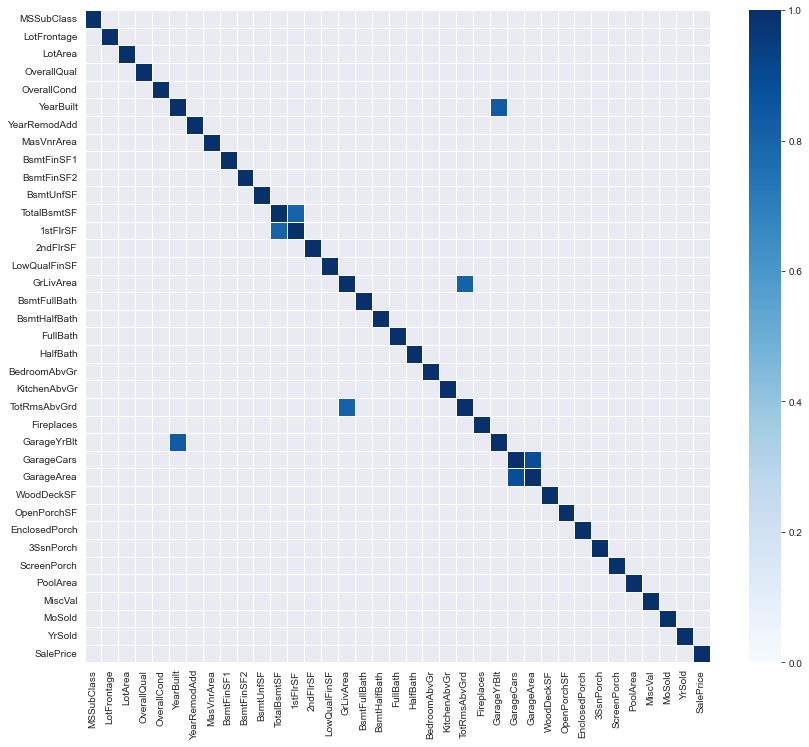

In [128]:
#Bi - Variate Analysis 
plt.figure(figsize = (14,12))
correlation = df[num_col].corr()
sns.set_style("darkgrid")
sns.heatmap(correlation, mask = abs(correlation) < 0.8, linewidths=0.5, cmap = 'Blues', vmin = 0, vmax = 1)


In [355]:
df.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageCars'], axis= 1, inplace = True)

In [153]:
df[df.columns[df.dtypes!=object]].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


##### Regplot vs SalePrice (target)

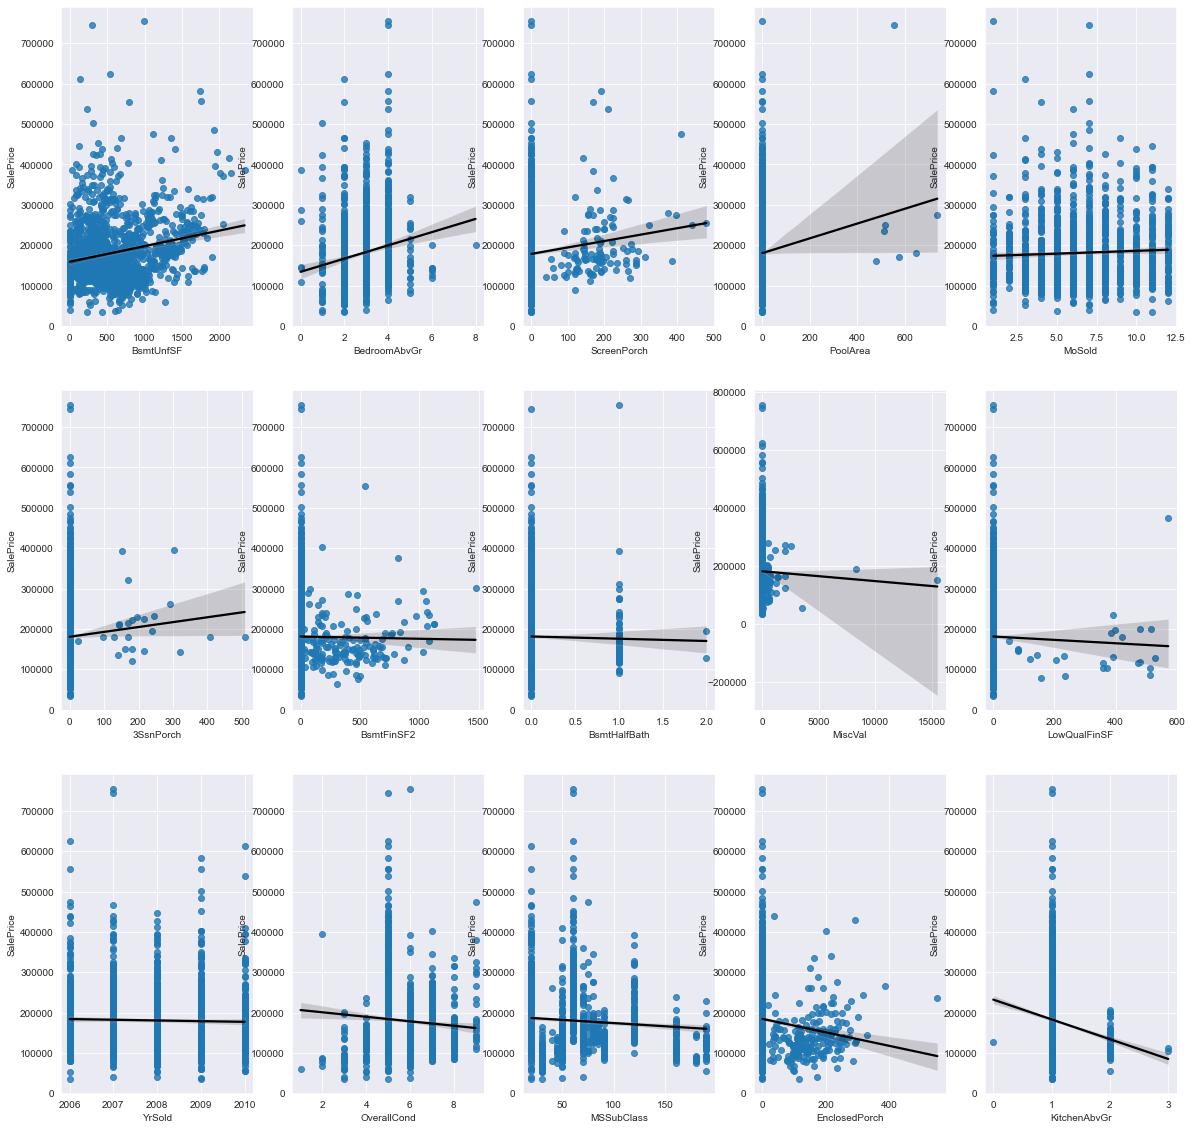

In [11]:
fig,axes = plt.subplots(figsize=(20,20))
df_num = df[df.columns[df.dtypes!= np.object]]
out_col= ['BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold',
       '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF',
       'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']    
for index, col in enumerate(out_col):
    plt.subplot(3,5,index+1)   
    sns.regplot(x = col, y = 'SalePrice', data=df, line_kws={'color':'black'})

In [356]:
df.drop(['MoSold'], axis=1, inplace=True)

##### Univariate analysis

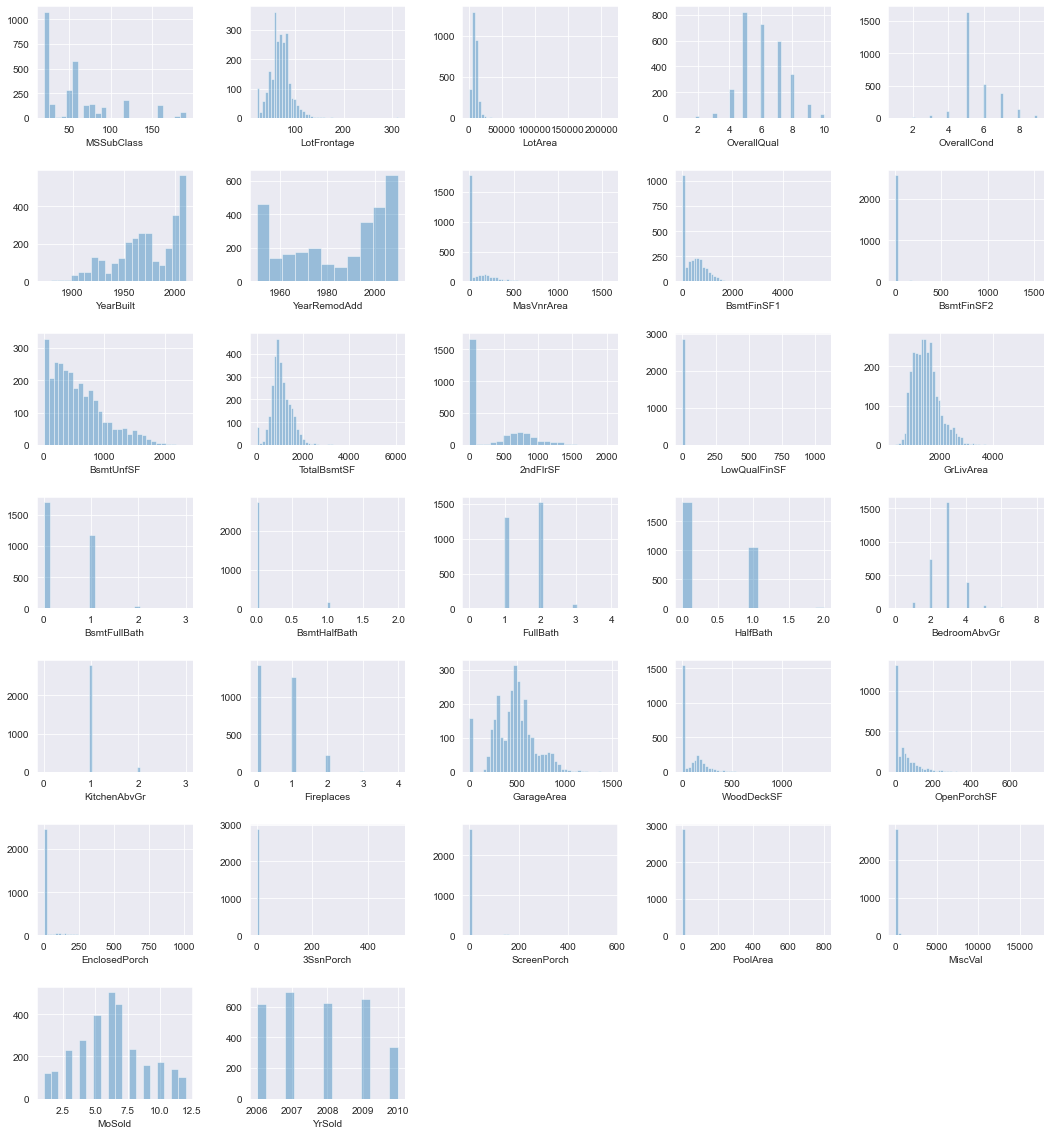

In [13]:
fig = plt.figure(figsize = (15,18))

for index, col in enumerate(df.drop('SalePrice',axis = 1).select_dtypes(exclude=['object'])):
    plt.subplot(8,5,index+1)
    sns.distplot(df[col], kde = False)
fig.tight_layout(pad = 2.0)    

In [357]:
#Remove features where 95%+ the same values
obj_col = df.select_dtypes(include=["object"]).columns
num_col = df.select_dtypes(exclude=["object"]).columns

overfit_col  = []
for i in obj_col:
    count = df[i].value_counts()
    max_val = count.iloc[0]
    if max_val/len(train) * 100 > 95:
        overfit_col.append(i)

for i in num_col:
    count = df[i].value_counts()
    max_val = count.iloc[0]
    if max_val/len(df) * 100 > 95:
        overfit_col.append(i)

df.drop(overfit_col, axis = 1, inplace = True)

##### Handling the Missing Values


In [229]:
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
BsmtQual          81
BsmtFinType1      79
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageArea         1
Exterior2nd        1
Exterior1st        1
TotalBsmtSF        1
dtype: int64

In [358]:
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageFinish', 'BsmtQual', 'BsmtFinType1'
]
df[group_1] = df[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

df[group_2] = df[group_2].fillna(0)

# Group 3:
group_3a = ['Exterior1st','Exterior2nd'
]

imputer = SimpleImputer(strategy='most_frequent')
df[group_3a] = pd.DataFrame(imputer.fit_transform(df[group_3a]), index=df.index)

df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

In [359]:
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending = False)

SalePrice    1459
dtype: int64

##### Outliers dealing

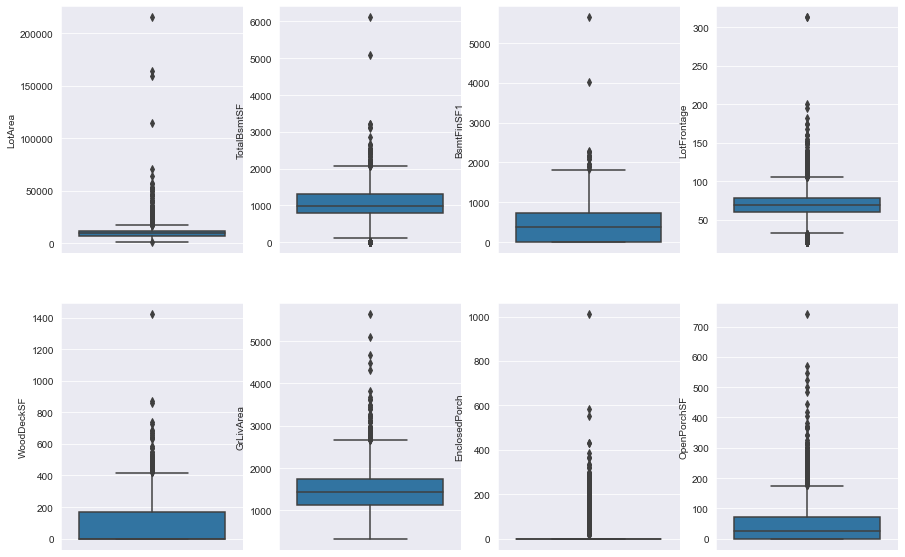

In [18]:
fig = plt.figure(figsize=(15,10))
outlier_target = ['LotArea', 'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'GrLivArea', 'EnclosedPorch', 'OpenPorchSF']
for index, col in enumerate(outlier_target): 
    plt.subplot(2,4,index+1)
    sns.boxplot(y = df[col],  data = df)

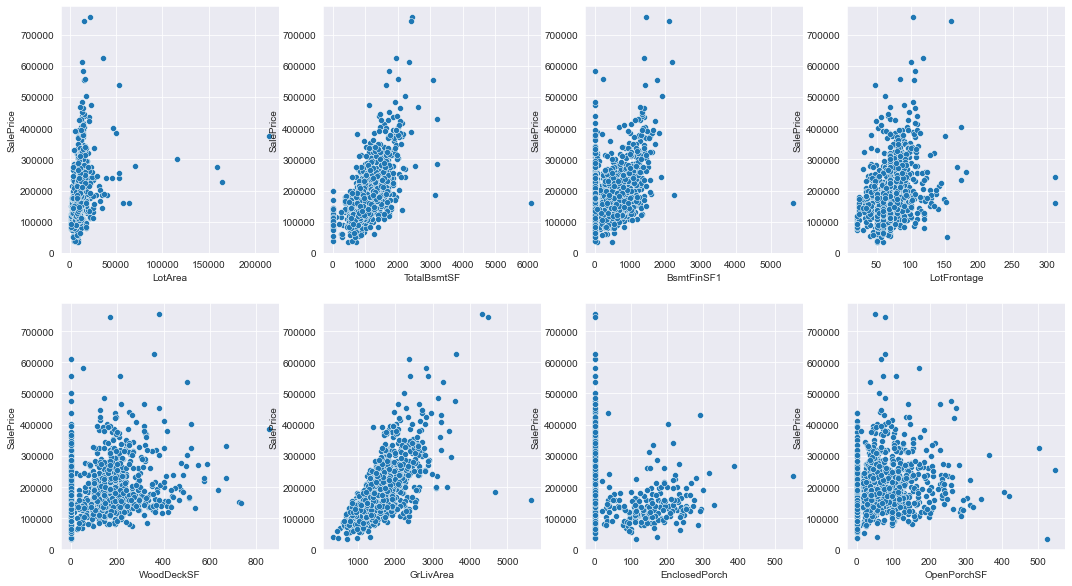

In [19]:
fig = plt.figure(figsize=(18,10))
outlier_target = ['LotArea', 'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'GrLivArea', 'EnclosedPorch', 'OpenPorchSF']
for index, col in enumerate(outlier_target): 
    plt.subplot(2,4,index+1)
    sns.scatterplot(x = df[col], y = df['SalePrice'])

In [250]:
df = df.drop(df[df['LotArea'] > 150000].index)
df = df.drop(df[df['TotalBsmtSF'] > 6000].index)
df = df.drop(df[df['BsmtFinSF1'] > 5000].index)
df = df.drop(df[df['LotFrontage'] > 300].index)
df = df.drop(df[:n_train][df[:n_train]['WoodDeckSF'] > 800].index)


### 3.Feature Engineering

##### Create binary features

In [360]:
colum = ['MasVnrArea','TotalBsmtSF','2ndFlrSF','WoodDeckSF']

for col in colum:
    col_name = col+'_bin'
    df[col_name] = df[col].apply(lambda x: 1 if x > 0 else 0)

##### Convert Categorical to numerical

In [361]:
df = pd.get_dummies(df, drop_first = True)

##### Add new features

In [362]:
df['TotalLot'] = df['LotFrontage'] + df['LotArea']
df['TotalBsmtFin'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['TotalSF'] = df['TotalBsmtSF'] + df['2ndFlrSF']
df['totalBathroom'] = df['FullBath'] + df.BsmtFullBath + 0.5 * (df['HalfBath'] + df['BsmtHalfBath'])
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
df['totalSqFeet'] = df['TotalBsmtSF'] + df['2ndFlrSF']
df['houseAge'] = df['YrSold'] - df['YearBuilt']
df['reModeled'] = np.where(df['YearRemodAdd'] == df['YearBuilt'], 0, 1)
df['isNew'] = np.where(df['YrSold'] == df['YearBuilt'], 1, 0)

##### Skewness 

In [235]:
mask = df.dtypes == np.float
float_cols = df.columns[mask]

In [363]:
#Skewness

skew_limit = 0.75

skew_vals = df[float_cols].skew().sort_values(ascending= False)

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
skew_cols             



,Skew
TotalLot,12.800239
BsmtFinSF2,4.148275
BsmtHalfBath,3.933616
MasVnrArea,2.614936
SalePrice,1.882876
LotFrontage,1.646420
BsmtFinSF1,1.425963
TotalBsmtFin,1.179252
TotalBsmtSF,1.157489
TotalSF,0.946945


In [364]:
for col in skew_cols.index.tolist():
    df[col] = np.log1p(df[col])
  

In [365]:
df[float_cols].skew().sort_values(ascending= False).head(5)

BsmtHalfBath     3.776703
BsmtFinSF2       2.463749
BsmtFullBath     0.625153
MasVnrArea       0.537294
totalBathroom    0.492500
dtype: float64

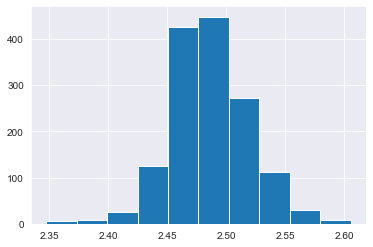

In [366]:
plt.hist(np.log(df["SalePrice"]))
df["SalePrice"] = np.log(train["SalePrice"])

### 4.Modeling

##### Preparing metrics

In [240]:
#Demaning metric - rmse:
def rmse(ytrue, ypred):
    """
    Return the RMSE.
    """
    return np.sqrt(mean_squared_error(ytrue, ypred))    

In [241]:
# rmse with cross-validation 5 folds:
n_folds = 5 

def rmse_cv(model): 
    """
    Return the average RMSE over all folds of training data.
    """
    
    kf = KFold(n_folds, shuffle = True, random_state = 2022)

    return np.sqrt(-cross_val_score(model, X_train, y_train, scoring= "neg_mean_squared_error", cv = kf)).mean()


In [32]:
#Testing regression
train = df[:1454].drop('SalePrice', axis = 1)
test = df[1454:]

y =  df[:1454]['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size= 0.3, random_state= 42)

In [375]:
#For kaggle_evaluation
X_train = df[:n_train]
X_test = df[n_train:].drop('SalePrice', axis = 1)


X_train = X_train.drop(X_train[X_train['LotArea'] > 150000].index)
X_train = X_train.drop(X_train[X_train['TotalBsmtSF'] > 6000].index)
X_train = X_train.drop(X_train[X_train['BsmtFinSF1'] > 5000].index)
X_train = X_train.drop(X_train[X_train['LotFrontage'] > 300].index)
X_train = X_train.drop(X_train[:n_train][X_train[:n_train]['WoodDeckSF'] > 800].index)


y_train = X_train['SalePrice']

X_train = X_train.drop('SalePrice', axis = 1)

In [33]:
#Feature Scaling
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [376]:
#For kaggle_evaluation
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [34]:
#Linear Regression

LR = LinearRegression()


LR = LR.fit(X_train, y_train)

linearRegression_train_rmse = rmse(y_train, LR.predict(X_train))
linearRegression_test_rmse = rmse(y_val, LR.predict(X_val))

linearRegression_train_r2 = r2_score(y_train, LR.predict(X_train))
linearRegression_test_r2 = r2_score(y_val, LR.predict(X_val))


print('Train_results: ',  linearRegression_train_rmse)
print('Test_results: ',  linearRegression_test_rmse)


Train_results:  0.11417327397874537
Test_results:  639581543.1257513


##### Ridge Regression

In [35]:
#Hyperparameter tuning

#RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas = alphas, cv = 5).fit(X_train, y_train)

print(ridgeCV.alpha_)

ridgeCV_train_rmse = rmse(y_train, ridgeCV.predict(X_train))
ridgeCV_test_rmse = rmse(y_val, ridgeCV.predict(X_val))

ridgeCV_train_r2 = r2_score(y_train, ridgeCV.predict(X_train))
ridgeCV_test_r2 = r2_score(y_val, ridgeCV.predict(X_val))

print('Train_results: ',  ridgeCV_train_rmse)
print('Test_results: ',  ridgeCV_test_rmse)
                      
                     

1.0
Train_results:  0.11408154997060922
Test_results:  0.13012769457858697


best lamda:  2.1313131313131315
best mse: 0.1385576208241625


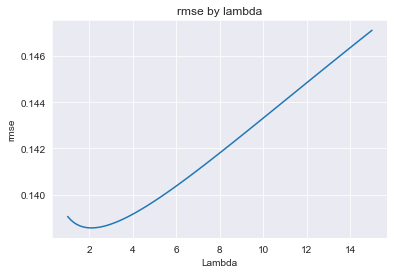

In [369]:
alphas_list = list(np.linspace(1, 15, 100))

rmse_cv_ridge = [rmse_cv(Ridge(alpha = alphas_)) for alphas_ in alphas_list]
rmse_cv_ridge = pd.Series(rmse_cv_ridge, index = alphas_list)

rmse_cv_ridge.plot(title = 'rmse by lambda')
plt.xlabel('Lambda')
plt.ylabel('rmse')

print("best lamda: ", rmse_cv_ridge.idxmin())
print("best mse:", rmse_cv_ridge.min())



In [262]:
#0.1385
ridge = Ridge(alpha = 2.1)

##### Lasso Regression

In [38]:
#LassoCV
warnings.filterwarnings('ignore')

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas = alphas2, cv = 5).fit(X_train, y_train)

print(lassoCV.alpha_)

lassoCV_train_rmse = rmse(y_train, lassoCV.predict(X_train))
lassoCV_test_rmse = rmse(y_val, lassoCV.predict(X_val))

lassoCV_train_r2 = r2_score(y_train, lassoCV.predict(X_train))
lassoCV_test_r2 = r2_score(y_val, lassoCV.predict(X_val))

print('Train_results: ',  lassoCV_train_rmse)
print('Test_results: ',  lassoCV_test_rmse)
                      

0.0005
Train_results:  0.11781485030118569
Test_results:  0.125623746388157


best lamda:  0.000706122448979592
best mse: 0.1375605605419783


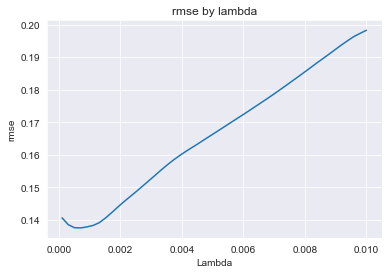

In [282]:
alphas_list_2 = np.linspace(0.0001, 0.01, 50)

rmse_cv_ridge = [rmse_cv(Lasso(alpha = alphas_)) for alphas_ in alphas_list_2]
rmse_cv_ridge = pd.Series(rmse_cv_ridge, index = alphas_list_2)

rmse_cv_ridge.plot(title = 'rmse by lambda')
plt.xlabel('Lambda')
plt.ylabel('rmse')

print("best lamda: ", rmse_cv_ridge.idxmin())
print("best mse:", rmse_cv_ridge.min())


In [283]:
lasso = Lasso(alpha = 0.0007)

##### ElasticNetCV

In [41]:
#ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_val, elasticNetCV.predict(X_val))

elasticNetCV_train_rmse = rmse(y_train, elasticNetCV.predict(X_train))
elasticNetCV_test_rmse = rmse(y_val, elasticNetCV.predict(X_val))

elasticNetCV_train_r2 = r2_score(y_train, elasticNetCV.predict(X_train))
elasticNetCV_test_r2 = r2_score(y_val, elasticNetCV.predict(X_val))


print('Train_results: ',  elasticNetCV_train_rmse)
print('Test_results: ',  elasticNetCV_test_rmse)

Train_results:  0.11630175216790593
Test_results:  0.12612138998460684


best lamda:  0.00102
best mse: 0.13710209456926298


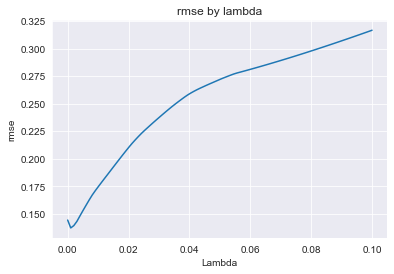

In [284]:
alphas_list_3 = np.linspace(1e-5, 0.1, 100)

rmse_cv_elasticnet = [rmse_cv(ElasticNet(alpha = alphas_)) for alphas_ in alphas_list_3]
rmse_cv_elasticnet = pd.Series(rmse_cv_elasticnet, index = alphas_list_3)

rmse_cv_elasticnet.plot(title = 'rmse by lambda')
plt.xlabel('Lambda')
plt.ylabel('rmse')

print("best lamda: ", rmse_cv_elasticnet.idxmin())
print("best mse:", rmse_cv_elasticnet.min())


In [285]:
elasticNet = ElasticNet(alpha = 0.001)

##### XGBoost

In [44]:
xgb1 = XGBRegressor()

rmse_cv(xgb1)


0.1494172770404414

In [45]:
xgb_param_test1 = {
    'max_depth': range(2,10,2),
    'min_child_weight': range(1, 6, 2)
}
xbg_tuning1 = GridSearchCV(estimator = XGBRegressor(),param_grid = xgb_param_test1, scoring= 'neg_mean_squared_error')
xbg_tuning1.fit(X_train, y_train)
xbg_tuning1.cv_results_,  xbg_tuning1.best_params_, xbg_tuning1.best_score_

({'mean_fit_time': array([0.13094864, 0.1207962 , 0.13240361, 0.17822261, 0.1701076 ,
         0.17277007, 0.31377416, 0.25505109, 0.23605037, 0.44057422,
         0.32409539, 0.3035821 ]),
  'std_fit_time': array([0.01099374, 0.00919782, 0.00682347, 0.00744335, 0.00346909,
         0.0203995 , 0.05365665, 0.01090996, 0.00673591, 0.03548884,
         0.03119506, 0.01749041]),
  'mean_score_time': array([0.00559845, 0.00618348, 0.00618424, 0.0057848 , 0.00572305,
         0.00523968, 0.00524774, 0.00584459, 0.00573053, 0.0060636 ,
         0.00559754, 0.0055851 ]),
  'std_score_time': array([0.00092063, 0.00039895, 0.00097725, 0.0003989 , 0.00038719,
         0.00040575, 0.00114517, 0.00044438, 0.00038644, 0.00014062,
         0.00049898, 0.00048854]),
  'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [46]:
xgb_param_test2 = {
    'min_child_weight': range(1, 6, 1)
}
xbg_tuning2 = GridSearchCV(estimator = XGBRegressor(max_depth = 2),param_grid = xgb_param_test2, scoring= 'neg_mean_squared_error')
xbg_tuning2.fit(X_train, y_train)
xbg_tuning2.cv_results_,  xbg_tuning2.best_params_, xbg_tuning2.best_score_

({'mean_fit_time': array([0.11045051, 0.10746136, 0.12500663, 0.10267882, 0.10779533]),
  'std_fit_time': array([0.00833235, 0.00196412, 0.02359143, 0.0051839 , 0.00521271]),
  'mean_score_time': array([0.00676599, 0.00438857, 0.00632777, 0.01013908, 0.00632277]),
  'std_score_time': array([0.00429276, 0.00223919, 0.00509914, 0.00591978, 0.00510105]),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 1},
   {'min_child_weight': 2},
   {'min_child_weight': 3},
   {'min_child_weight': 4},
   {'min_child_weight': 5}],
  'split0_test_score': array([-0.02857057, -0.03020001, -0.02780693, -0.02630406, -0.02610047]),
  'split1_test_score': array([-0.02284129, -0.02427099, -0.02507964, -0.02493161, -0.02548807]),
  'split2_test_score': array([-0.01672878, -0.0157398 , -0.01474402, -0.01476203, -0.0155274 ]),
  'split3_test_score': array([

In [47]:
xgb_param_test3 = {
    'gamma': [i/10.0 for i in range(0, 10)]
}
xbg_tuning3 = GridSearchCV(estimator = XGBRegressor(max_depth = 2, min_child_weight = 1),param_grid = xgb_param_test3, scoring= 'neg_mean_squared_error')
xbg_tuning3.fit(X_train, y_train)
xbg_tuning3.cv_results_,  xbg_tuning3.best_params_, xbg_tuning3.best_score_

({'mean_fit_time': array([0.10474267, 0.10824471, 0.11803718, 0.10461192, 0.11250143,
         0.10360222, 0.10907149, 0.10280309, 0.09821386, 0.09611259]),
  'std_fit_time': array([0.00988   , 0.01009446, 0.00376864, 0.0070261 , 0.0085314 ,
         0.01044226, 0.00886707, 0.01123259, 0.00639039, 0.0053353 ]),
  'mean_score_time': array([0.00631595, 0.00631642, 0.00558543, 0.00631599, 0.0043889 ,
         0.00529461, 0.00207567, 0.0094408 , 0.00480499, 0.00732632]),
  'std_score_time': array([0.0051012 , 0.00510153, 0.00048891, 0.00510171, 0.0022394 ,
         0.00733666, 0.00205938, 0.00505972, 0.00574697, 0.00705345]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma'

In [48]:
xgb_param_test4 = {
    'subsample': [i/10.0 for i in range(1,10)],
    'colsample_bytree' : [i/10.0 for i in range(1, 10)]
    }
xbg_tuning4 = GridSearchCV(estimator = XGBRegressor(max_depth = 2, min_child_weight = 1, gamma = 0),param_grid = xgb_param_test4, scoring= 'neg_mean_squared_error')
xbg_tuning4.fit(X_train, y_train)
xbg_tuning4.cv_results_,  xbg_tuning4.best_params_, xbg_tuning4.best_score_
    

({'mean_fit_time': array([0.06821346, 0.07225852, 0.06435761, 0.07500381, 0.07115574,
         0.07446971, 0.07101884, 0.08498387, 0.08800673, 0.07210202,
         0.07324862, 0.06961465, 0.08094921, 0.08350949, 0.07399178,
         0.07617817, 0.08109865, 0.07721939, 0.07498522, 0.08250675,
         0.07624412, 0.07778201, 0.07431998, 0.08656979, 0.07898974,
         0.07699513, 0.0771945 , 0.06901622, 0.07081161, 0.07280631,
         0.09554543, 0.1168551 , 0.0847837 , 0.08656979, 0.07692199,
         0.06954594, 0.06281238, 0.07206411, 0.08579493, 0.08419561,
         0.08224916, 0.08693991, 0.08367672, 0.08606453, 0.12243485,
         0.09410586, 0.08250728, 0.09024243, 0.09059868, 0.0828886 ,
         0.08044682, 0.08191595, 0.08298125, 0.08175569, 0.07875509,
         0.09014277, 0.09316401, 0.08635931, 0.08157363, 0.08364491,
         0.08289127, 0.08276796, 0.08539333, 0.06996741, 0.07466955,
         0.07888474, 0.08105474, 0.08457785, 0.0880383 , 0.08577166,
         0.083378

In [49]:
xgb_param_test5 = {
    'reg_alpha': [0, 0.00001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    }
xbg_tuning5 = GridSearchCV(estimator = XGBRegressor(max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8),param_grid = xgb_param_test5, scoring= 'neg_mean_squared_error')
xbg_tuning5.fit(X_train, y_train)
xbg_tuning5.cv_results_,  xbg_tuning5.best_params_, xbg_tuning5.best_score_

({'mean_fit_time': array([0.06908779, 0.07484956, 0.07011709, 0.07075701, 0.06682444,
         0.07105303, 0.07552052, 0.06680465, 0.06368546, 0.06954165]),
  'std_fit_time': array([0.00736004, 0.00468092, 0.00604306, 0.00924681, 0.00801071,
         0.00849213, 0.00745615, 0.00530058, 0.00587714, 0.00860212]),
  'mean_score_time': array([0.00239372, 0.00418925, 0.00259337, 0.00127287, 0.00624852,
         0.00159593, 0.00066724, 0.00538139, 0.00392232, 0.00079799]),
  'std_score_time': array([0.00195447, 0.00039887, 0.00214855, 0.00164037, 0.00765285,
         0.0019546 , 0.00133448, 0.00673194, 0.00605034, 0.00159597]),
  'param_reg_alpha': masked_array(data=[0, 1e-05, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                     1],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 1e-05},
   {'reg_alpha': 0.0005},
  

In [50]:
xgb_param_test6 = {
    'reg_lambda': [ 0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
    }
xbg_tuning6 = GridSearchCV(estimator = XGBRegressor(max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8, reg_alpha = 1e-05),param_grid = xgb_param_test6, scoring= 'neg_mean_squared_error')
xbg_tuning6.fit(X_train, y_train)
xbg_tuning6.cv_results_,  xbg_tuning6.best_params_, xbg_tuning6.best_score_

({'mean_fit_time': array([0.06668024, 0.07186117, 0.08983064, 0.07075763, 0.07057562,
         0.08335643, 0.07822981, 0.08281646]),
  'std_fit_time': array([0.00687818, 0.01241026, 0.01712899, 0.00081784, 0.00235148,
         0.00364956, 0.0016374 , 0.00285598]),
  'mean_score_time': array([0.00392222, 0.00159593, 0.00830064, 0.00435786, 0.00428271,
         0.00498667, 0.00444899, 0.00454173]),
  'std_score_time': array([0.00605034, 0.0019546 , 0.00778467, 0.00044613, 0.00030549,
         0.00063098, 0.00024653, 0.00043725]),
  'param_reg_lambda': masked_array(data=[0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 0.1},
   {'reg_lambda': 0.5},
   {'reg_lambda': 1},
   {'reg_lambda': 1.1},
   {'reg_lambda': 1.2},
   {'reg_lambda': 1.3},
   {'reg_lambda': 1.4},
   {'reg_lambda': 1.5}],
  'split0_test_score': array([-0.03080373, -0.0241232

In [51]:
xgb2 = XGBRegressor(max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8, reg_alpha = 1e-05, reg_lambda = 1.1)

print(xgb2.get_params)

rmse_cv(xgb2)


<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.3,
             enable_categorical=False, gamma=0, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=1e-05, reg_lambda=1.1,
             scale_pos_weight=None, subsample=0.8, tree_method=None,
             validate_parameters=None, verbosity=None)>


0.1415865142497124

In [52]:
xgb_param_test7 = {
    'n_estimators': [i for i in range (100, 1000, 50)],
    }
xbg_tuning7 = GridSearchCV(estimator = XGBRegressor(max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8, reg_alpha = 1e-05, reg_lambda = 1.1), param_grid = xgb_param_test7, scoring= 'neg_mean_squared_error')
xbg_tuning7.fit(X_train, y_train)
xbg_tuning7.cv_results_,  xbg_tuning7.best_params_, xbg_tuning7.best_score_

({'mean_fit_time': array([0.08221469, 0.12885952, 0.16449823, 0.18832717, 0.22662768,
         0.26997848, 0.39848762, 0.37693934, 0.38569837, 0.42580652,
         0.43097639, 0.47374072, 0.47189007, 0.54650612, 0.55099602,
         0.54063425, 0.53929882, 0.57010741]),
  'std_fit_time': array([0.003486  , 0.01674044, 0.0149507 , 0.01447832, 0.01482176,
         0.01416809, 0.06741429, 0.0340467 , 0.01323631, 0.00555207,
         0.02032931, 0.03708294, 0.02402615, 0.03873492, 0.06577814,
         0.02149794, 0.01147343, 0.01963175]),
  'mean_score_time': array([0.00478749, 0.00498433, 0.00458813, 0.00478492, 0.00438843,
         0.00458789, 0.004986  , 0.00478802, 0.00498686, 0.00518804,
         0.00379024, 0.00498638, 0.00538568, 0.00824337, 0.00398879,
         0.00804443, 0.00418825, 0.00239291]),
  'std_score_time': array([7.46493199e-04, 3.83372331e-06, 4.88811723e-04, 3.97776934e-04,
         4.88246874e-04, 4.88422209e-04, 1.29186794e-06, 3.99282196e-04,
         1.27592928e-0

In [53]:
xgb_param_test8 = {
    'learning_rate' : [0, 0.01, 0.15, 0.3, 0.35, 0.45, 0.5],
    }
xbg_tuning8 = GridSearchCV(estimator = XGBRegressor(n_estimators = 100, max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8, reg_alpha = 1e-05, reg_lambda = 1.1), param_grid = xgb_param_test8, scoring= 'neg_mean_squared_error')
xbg_tuning8.fit(X_train, y_train)
xbg_tuning8.cv_results_,  xbg_tuning8.best_params_, xbg_tuning8.best_score_

({'mean_fit_time': array([0.05265145, 0.05173779, 0.06681371, 0.06595855, 0.06841798,
         0.07500024, 0.06702313]),
  'std_fit_time': array([0.00237722, 0.00697132, 0.01068278, 0.0097411 , 0.00162066,
         0.00291776, 0.00197395]),
  'mean_score_time': array([0.00299182, 0.00159574, 0.00392218, 0.00159583, 0.00418911,
         0.00458813, 0.00307302]),
  'std_score_time': array([0.00154493, 0.00195437, 0.00605024, 0.00195449, 0.00039942,
         0.0004893 , 0.00155377]),
  'param_learning_rate': masked_array(data=[0, 0.01, 0.15, 0.3, 0.35, 0.45, 0.5],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0},
   {'learning_rate': 0.01},
   {'learning_rate': 0.15},
   {'learning_rate': 0.3},
   {'learning_rate': 0.35},
   {'learning_rate': 0.45},
   {'learning_rate': 0.5}],
  'split0_test_score': array([-1.33019876e+02, -1.79615057e+01, -2.55904204e-02, -2.33952952e-02,
       

In [101]:
xgb3 = XGBRegressor(learning_rate = 0.3, n_estimators = 100, max_depth = 2, min_child_weight = 1, gamma = 0, 
colsample_bytree = 0.3, subsample = 0.8, reg_alpha = 1e-05, reg_lambda = 1.1 )

print(xgb3.get_params)

rmse_cv(xgb3)

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.3,
             enable_categorical=False, gamma=0, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_delta_step=None, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=1e-05, reg_lambda=1.1,
             scale_pos_weight=None, subsample=0.8, tree_method=None,
             validate_parameters=None, verbosity=None)>


0.13563456985620506

##### LightGBM

In [55]:
lgbm1 = LGBMRegressor(objective='regression')

rmse_cv(lgbm1)


0.1374178411757675

In [ ]:
lgbm_test_para1 = {
    'num_leaves': [i for i in range (0, 20) ],
    'min_data_in_leaf': [i for i in range(0, 20)]
}

lgbm_test_para1 = GridSearchCV(estimator = LGBMRegressor(objective = 'regression'), param_grid = lgbm_test_para1, scoring = 'neg_mean_squared_error')
lgbm_test_para1.fit(X_train, y_train)
lgbm_test_para1.cv_results_, lgbm_test_para1.best_params_, lgbm_test_para1.best_score_

In [ ]:
lgbm_test_para2 = {
    'min_data_in_leaf': [i for i in range(0, 25)]
}

lgbm_test_para2 = GridSearchCV(estimator = LGBMRegressor(objective = 'regression', num_leaves= 5), param_grid = lgbm_test_para2, scoring = 'neg_mean_squared_error')
lgbm_test_para2.fit(X_train, y_train)
lgbm_test_para2.cv_results_, lgbm_test_para2.best_params_, lgbm_test_para2.best_score_

[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is

({'mean_fit_time': array([0.02630434, 0.02762251, 0.02443414, 0.03066616, 0.03268781,
         0.02932167, 0.03330965, 0.02997818, 0.03123879, 0.03249617,
         0.02476406, 0.02714958, 0.03247867, 0.0294704 , 0.02373371,
         0.03017864, 0.03291235, 0.02683744, 0.02641001, 0.02655759,
         0.02520833, 0.02686143, 0.02574697, 0.02610345, 0.02685456]),
  'std_fit_time': array([0.00603837, 0.00607715, 0.00817165, 0.00604868, 0.00155091,
         0.01003301, 0.00669139, 0.002508  , 0.00893292, 0.0055373 ,
         0.00747664, 0.01069072, 0.00749183, 0.00773092, 0.00858209,
         0.00663912, 0.00381808, 0.00823868, 0.00675997, 0.00946243,
         0.00592478, 0.00528175, 0.00838095, 0.00693274, 0.00590054]),
  'mean_score_time': array([0.        , 0.        , 0.00019946, 0.        , 0.00039887,
         0.00019951, 0.00019951, 0.00312443, 0.00019946, 0.00019951,
         0.00019937, 0.00332365, 0.00019946, 0.00019946, 0.00332379,
         0.        , 0.00019946, 0.00019932, 0.

In [ ]:
lgbm_test_para3 = {
    'max_depth': [i for i in range (0, 10) ]
}

lgbm_test_para3 = GridSearchCV(estimator = LGBMRegressor(objective = 'regression', num_leaves= 5, min_data_in_leaf = 21), param_grid = lgbm_test_para3, scoring = 'neg_mean_squared_error')
lgbm_test_para3.fit(X_train, y_train)
lgbm_test_para3.cv_results_, lgbm_test_para3.best_params_, lgbm_test_para3.best_score_

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min

({'mean_fit_time': array([0.02970314, 0.01627855, 0.02063031, 0.02750912, 0.02792964,
         0.02686405, 0.02989888, 0.03311677, 0.02976904, 0.02998848]),
  'std_fit_time': array([0.00552397, 0.0084802 , 0.00763938, 0.00773591, 0.00513064,
         0.00647302, 0.00800338, 0.0102332 , 0.00813639, 0.00640527]),
  'mean_score_time': array([0.00000000e+00, 1.99508667e-04, 3.98969650e-04, 1.99413300e-04,
         1.99508667e-04, 1.99460983e-04, 7.82489777e-05, 3.32365036e-03,
         1.99460983e-04, 1.99460983e-04]),
  'std_score_time': array([0.        , 0.00039902, 0.00048864, 0.00039883, 0.00039902,
         0.00039892, 0.0001565 , 0.00616077, 0.00039892, 0.00039892]),
  'param_max_depth': masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 0},
   {'max_depth': 1},
   {'max_depth': 2},
   {'max_d

In [66]:
lgbm2 = LGBMRegressor(objective='regression', num_leaves= 5, min_data_in_leaf = 21, max_depth=0)

rmse_cv(lgbm2)


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


0.13052314495767975

##### CatBoost Regressor

In [67]:
cb1 = CatBoostRegressor(loss_function='RMSE', logging_level= 'Silent')
rmse_cv(cb1)

0.12601751149378457

### 5.Results

#####  Averaging Model

In [173]:
class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        
        predictions = np.column_stack([model.predict(X) for model in self.models_])

        return np.mean(predictions, axis=1)          

In [286]:
avg_model = AveragingModel(models = (ridge, lasso,  elasticNet, xgb3, lgbm2, cb1))
rmse_cv(avg_model)


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


0.12715136047370718

In [377]:
avg_model.fit(X_train, y_train)
predictions = np.exp(avg_model.predict(X_test))
output = pd.DataFrame({'Id': test_ID, 'SalePrice': predictions})
output.to_csv('C:/kaggle projects/Housing Prices Competition for Kaggle Learn Users/submission.csv', index=False)

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
